In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSdPrGMkqv7Zqx3EHdIxK_tgKhrWWicQTmOQMVVlbniulrkAvkZhowHUgndUXuerUnjSXv8ItYsOWv4/pub?gid=0&single=true&output=csv"

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


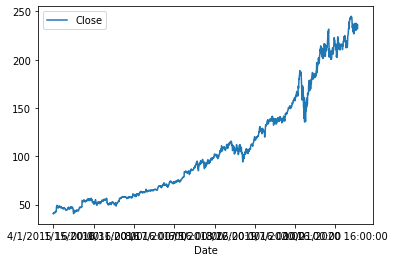

In [6]:
df.plot(x="Date",y="Close")


In [7]:
from statsmodels.base.transform import BoxCox

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
bc = BoxCox()   # FOR NORMAL HYPERBOLO CHECK WIKI 

In [9]:
df['Close'],lmbda = bc.transform_boxcox(df['Close'])

In [10]:
data = df[['Date','Close']]
data.columns=["ds","y"]  # MAKING A NEW DATA SET OF DATE AND CLOSE 

In [11]:
model_params ={
    "daily_seasonality":False,     # ADDING PARA OF DAILY , WEEKLY , YEARLY 
    "weekly_seasonality":False,
    "yearly_seasonality":True,
    "seasonality_mode":"multiplicative",
    "growth":"logistic"
}

In [12]:
from fbprophet import Prophet

model = Prophet(**model_params)

data['cap']=data['y'].max() + data['y'].std() *0.05 # HIGHEST CAP FOR CLSOING DAY 

model.fit(data)

future = model.make_future_dataframe(periods=365)
future['cap']=data['cap'].max()
forecast = model.predict(future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


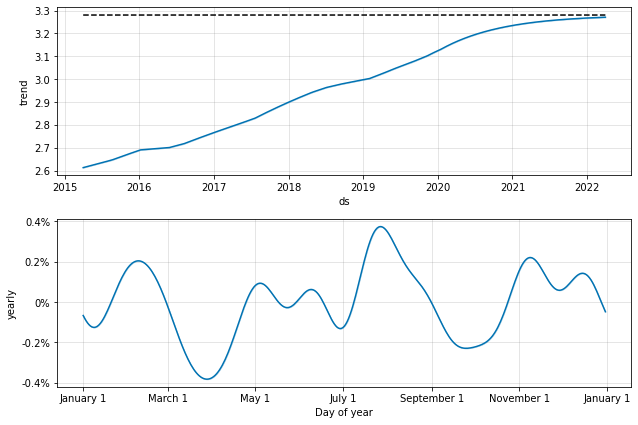

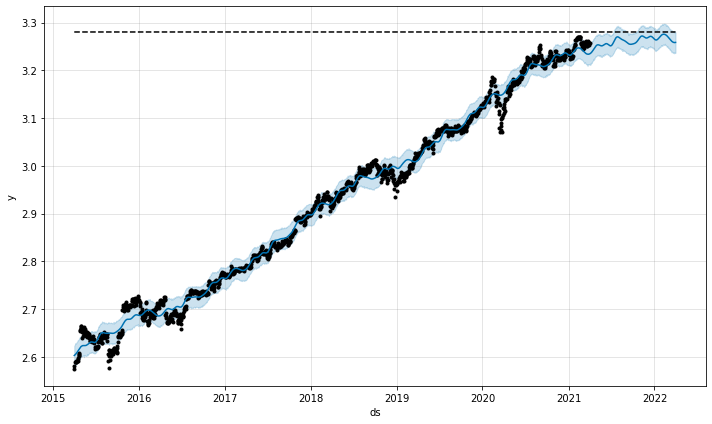

In [13]:
model.plot_components(forecast);
model.plot(forecast);

In [14]:
model = Prophet(**model_params)

model = model.add_seasonality(name="monthly",period=30,fourier_order=10)  #ADDING MONTHLY 
model = model.add_seasonality(name="quartely",period=92.25,fourier_order=10) # ADDING QUARTELY 

model.add_country_holidays("US")  # ADDING HOLIDAYS

model.fit(data)

future = model.make_future_dataframe(periods=365)  # FOR NET 356 DAYSS PREDICTION 
future['cap']=data['cap'].max()

forecast = model.predict(future)

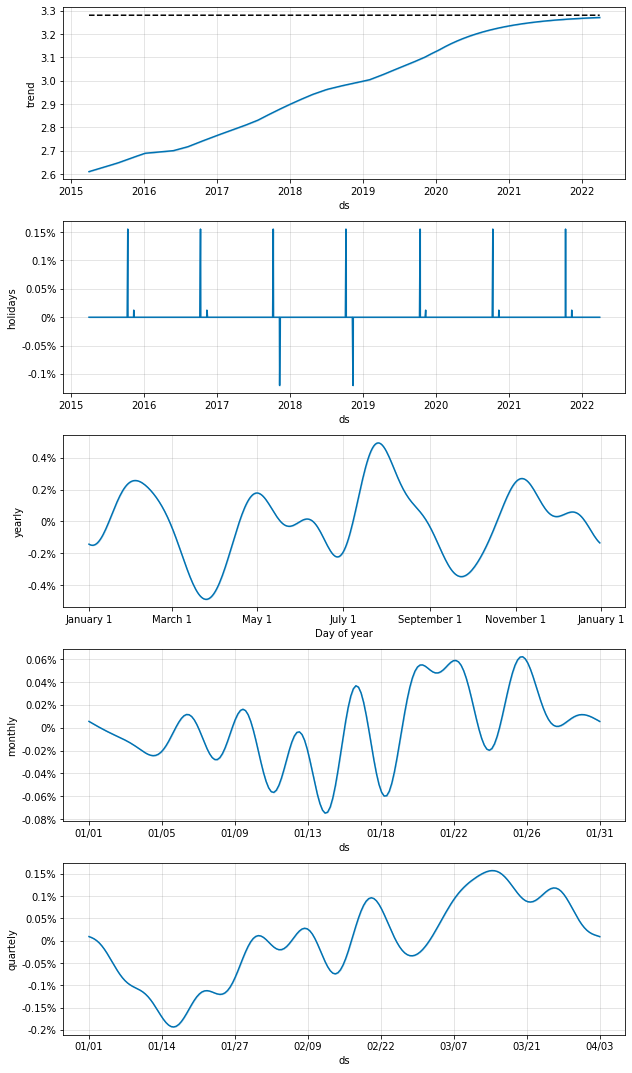

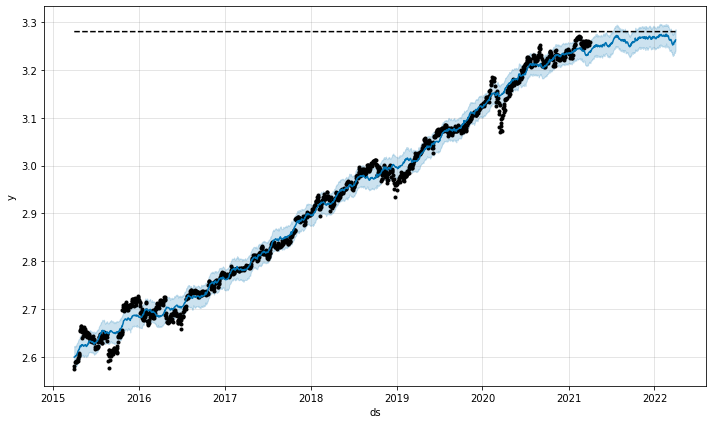

In [15]:
model.plot_components(forecast);
model.plot(forecast);

In [20]:
import itertools
import numpy as ny
from fbprophet.diagnostics import cross_validation, performance_metrics
#HYPER PARA 
param_grid ={
    "daily_seasonality":[False],
    "weekly_seasonality":[False],
    "yearly_seasonality":[True],
    "growth":["logistic"],
    "changepoint_prior_scale":[0.001,0.01,0.1,0.5],
    'seasonality_prior_scale':[0.01,0.1,1.0,10],

}
# Generate all combinations of parameters
all_params= [
              dict(zip(param_grid.keys(),v))
              for v in itertools.product(*param_grid.values())
]
print(all_params)



[{'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_pri

In [23]:
rmses=list()
# go to all params 
for params in all_params:
  m = Prophet(**params)

  m = m.add_seasonality(name='monthly',period=30,fourier_order=5)
  m = m.add_seasonality(name='quaterly', period= 92.5 , fourier_order=10)

  m = m.add_country_holidays(country_name = "US")

  m.fit(data)

  df_cv = cross_validation(m, initial = '730 days', period = '365 days', horizon = '365 days', parallel = 'processes')  #train 730 days then test next 365 dAYS AND SO ON
  df_p = performance_metrics(df_cv, rolling_window=1)  # USE CROSS VAL IN PERFOR METRICS

  rmses.append(df_p['rmse'].values[0])   #root mean sq e

# min argu / best params 
best_param = all_params[ny.argmin(rmses)]               #Returns the indices of the minimum values along an axis.
print(best_param)



INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-04-01 16:00:00 and 2020-03-31 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f27aca80810>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-04-01 16:00:00 and 2020-03-31 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f27aca80090>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-04-01 16:00:00 and 2020-03-31 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f27aca80650>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-04-01 16:00:00 and 2020-03-31 16:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f27aca80490>
INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-04-01 16:00:00 and 2020-03-31 16:00:00
INFO:fbprophet:Applying in parallel with <con

{'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10}


In [24]:
best_model = Prophet(**best_param)

best_model = best_model.add_seasonality(name='monthly',period=30,fourier_order=5)
best_model = best_model.add_seasonality(name='quarterly',period=92.25,fourier_order=10)

best_model = best_model.add_country_holidays(country_name = "US")

best_model.fit(data)

future = best_model.make_future_dataframe(periods=365, freq="D")  # FOR NET 356 DAYSS PREDICTION 
future['cap']=data['cap'].max()

forecast = best_model.predict(future)



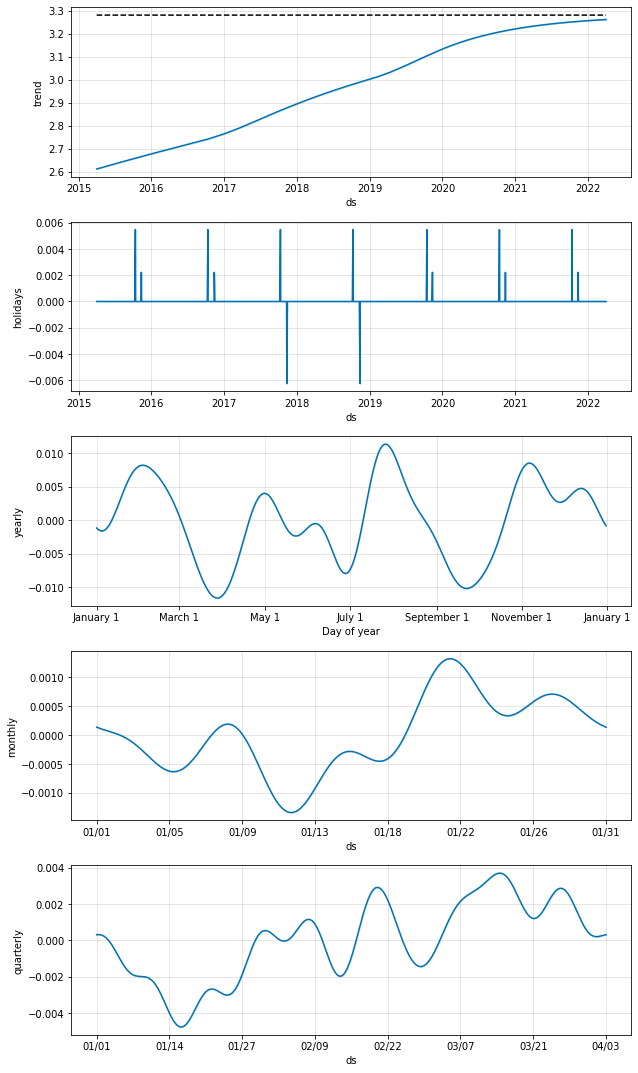

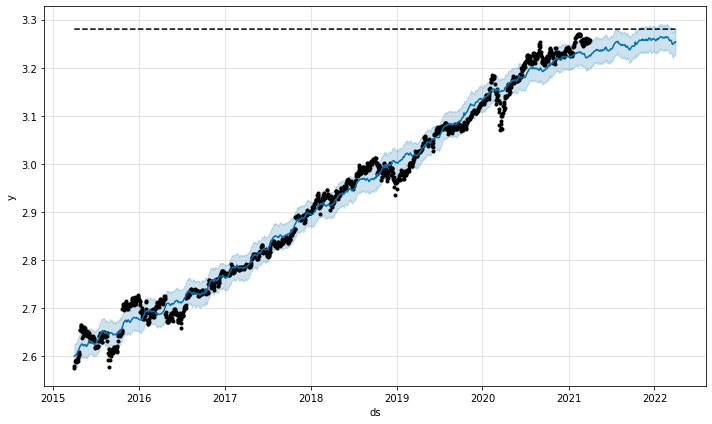

In [25]:
best_model.plot_components(forecast);
best_model.plot(forecast);

In [26]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ds                                 1876 non-null   datetime64[ns]
 1   trend                              1876 non-null   float64       
 2   cap                                1876 non-null   float64       
 3   yhat_lower                         1876 non-null   float64       
 4   yhat_upper                         1876 non-null   float64       
 5   trend_lower                        1876 non-null   float64       
 6   trend_upper                        1876 non-null   float64       
 7   Christmas Day                      1876 non-null   float64       
 8   Christmas Day_lower                1876 non-null   float64       
 9   Christmas Day_upper                1876 non-null   float64       
 10  Christmas Day (Observed)           1

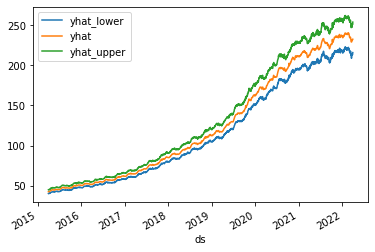

In [28]:
#untransformation to normal val 
forecast['yhat'] = bc.untransform_boxcox(x=forecast['yhat'],lmbda=lmbda)

forecast['yhat_lower'] = bc.untransform_boxcox(x=forecast['yhat_lower'],lmbda=lmbda)

forecast['yhat_upper'] = bc.untransform_boxcox(x=forecast['yhat_upper'],lmbda=lmbda)

forecast.plot(x='ds',y=['yhat_lower','yhat','yhat_upper'])